# Project: Neural Networks and Deep Learning

*Adapted from https://www.tensorflow.org/tutorials/images/cnn*

# Building and Optimizing a CNN

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### 1. Choose a Dataset (CIFAR10)

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
replace_dict = {1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0}
for key, value in replace_dict.items():
    train_labels[train_labels == key] = value
    test_labels[test_labels == key] = value
print(train_labels)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


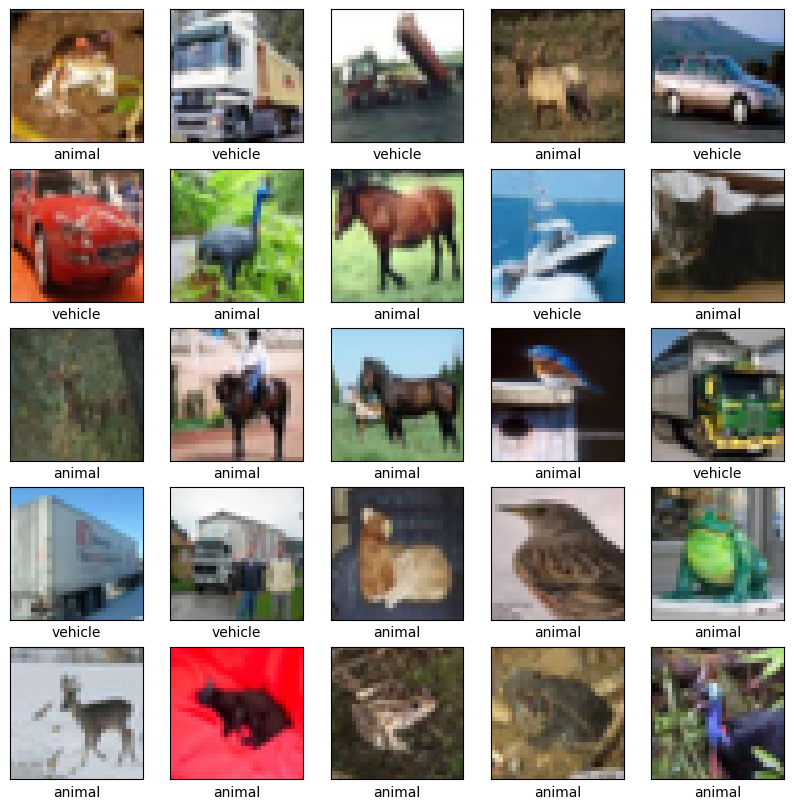

In [4]:
class_names = ['vehicle', 'animal']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### 2/3. Build Initial CNN Model and Refine Architecture

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,985 (476.50 KB)

 Trainable params: 121,985 (476.50 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Train model

In [8]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.F1Score(), tf.keras.metrics.AUC()])

history = model.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels))

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.8405 - auc: 0.9093 - f1_score: 0.7503 - loss: 0.3568 - precision: 0.8570 - recall: 0.8821 - val_accuracy: 0.8976 - val_auc: 0.9676 - val_f1_score: 0.7500 - val_loss: 0.2575 - val_precision: 0.8735 - val_recall: 0.9698
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.9093 - auc: 0.9652 - f1_score: 0.7496 - loss: 0.2310 - precision: 0.9197 - recall: 0.9300 - val_accuracy: 0.9149 - val_auc: 0.9742 - val_f1_score: 0.7500 - val_loss: 0.2154 - val_precision: 0.9042 - val_recall: 0.9598
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.9185 - auc: 0.9730 - f1_score: 0.7470 - loss: 0.2040 - precision: 0.9269 - recall: 0.9373 - val_accuracy: 0.9061 - val_auc: 0.9775 - val_f1_score: 0.7500 - val_loss: 0.2286 - val_precision: 0.9647 - val_recall: 0.8755


# 3. Evaluating Model Effectiveness

### Evaluate Performance

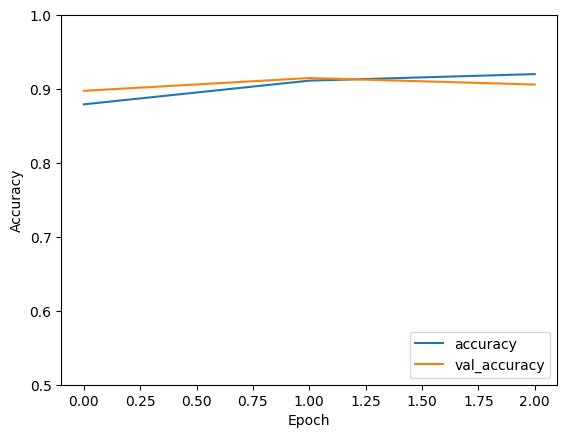

In [9]:
# Accuracy over training epochs 1-3

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [10]:
test_loss, test_acc, test_pre, test_rec, test_f1, test_AUC = model.evaluate(test_images,  test_labels, verbose=2) # show metrics

313/313 - 3s - 10ms/step - accuracy: 0.9061 - auc: 0.9775 - f1_score: 0.7500 - loss: 0.2286 - precision: 0.9647 - recall: 0.8755


# 4. Creative Application



### 1. Classification Task

Using the CIFAR100 dataset, we will create a model that examines images of animals, specifically mammals, and can detect if an animal is a large dangerous predator or not.

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode="coarse") # Load CIFAR100

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
# Reduce dataset to only mammals

# Define labels to keep
labels_to_include = [8, 11, 12, 16]  # labels involving mammals, carnivorous and otherwise

# Create mask to filter
train_mask = np.isin(train_labels, labels_to_include)
test_mask = np.isin(test_labels, labels_to_include)

# Apply mask
train_images_filtered = train_images[train_mask.squeeze()]
train_labels_filtered = train_labels[train_mask.squeeze()]
test_images_filtered = test_images[test_mask.squeeze()]
test_labels_filtered = test_labels[test_mask.squeeze()]

print("Filtered train set shape:", train_images_filtered.shape)
print("Filtered test set shape:", test_images_filtered.shape)

Filtered train set shape: (10000, 32, 32, 3)
Filtered test set shape: (2000, 32, 32, 3)


In [13]:
# Replace labels for binary classification
replace_dict = {8: 0, 11: 1, 12: 1, 16: 1}
for key, value in replace_dict.items():
    train_labels_filtered[train_labels_filtered == key] = value
    test_labels_filtered[test_labels_filtered == key] = value

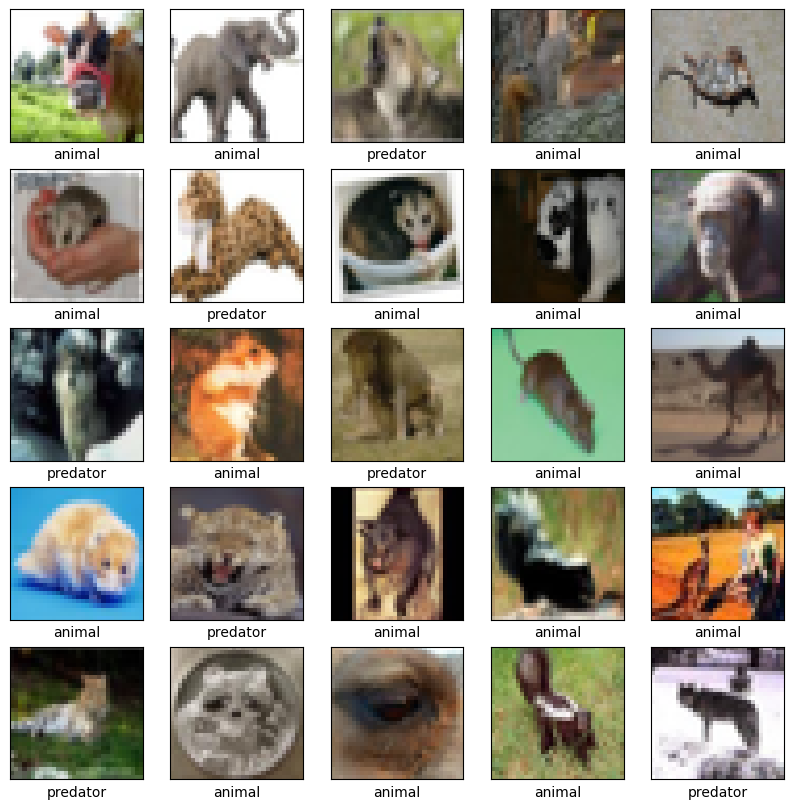

In [14]:
# Display data

class_names = ['predator', 'animal']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_filtered[i])
    plt.xlabel(class_names[train_labels_filtered[i][0]])
plt.show()

### 2. Build and optimize CNN

In [15]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.F1Score(), tf.keras.metrics.AUC()])

history = model.fit(train_images_filtered, train_labels_filtered, epochs=3,
                    validation_data=(test_images_filtered, test_labels_filtered))

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.6890 - auc_1: 0.4902 - f1_score: 0.8346 - loss: 10.8773 - precision_1: 0.7431 - recall_1: 0.8892 - val_accuracy: 0.7470 - val_auc_1: 0.4967 - val_f1_score: 0.8571 - val_loss: 0.5668 - val_precision_1: 0.7495 - val_recall_1: 0.9953
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7451 - auc_1: 0.5017 - f1_score: 0.8544 - loss: 0.5701 - precision_1: 0.7458 - recall_1: 0.9985 - val_accuracy: 0.7480 - val_auc_1: 0.5010 - val_f1_score: 0.8571 - val_loss: 0.5644 - val_precision_1: 0.7497 - val_recall_1: 0.9967
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.7484 - auc_1: 0.5002 - f1_score: 0.8557 - loss: 0.5638 - precision_1: 0.7483 - recall_1: 0.9997 - val_accuracy: 0.7490 - val_auc_1: 0.5013 - val_f1_score: 0.8571 - val_loss: 0.5640 - val_precision_1: 0.7500 - val_recall_1: 0.9980


### 3. Debug and Evaluate

In [16]:
test_loss, test_acc, test_pre, test_rec, test_f1, test_AUC = model.evaluate(test_images_filtered,  test_labels_filtered, verbose=2)

63/63 - 1s - 17ms/step - accuracy: 0.7490 - auc_1: 0.5013 - f1_score: 0.8571 - loss: 0.5640 - precision_1: 0.7500 - recall_1: 0.9980


Based on results, the model is likely only predicting one of the two labels. Further tuning is required.

In [17]:
# New model with addition of dropout layers to prevent overfitting

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 405,633 (1.55 MB)

 Trainable params: 404,737 (1.54 MB)

 Non-trainable params: 896 (3.50 KB)

In [18]:
# Balance class weights to improve performance

np.unique(train_labels_filtered, return_counts=True)

(array([0, 1]), array([2500, 7500]))

In [19]:
class_weight = {0: 3.,
                1: 1.}

In [24]:
import keras.optimizers

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-06), # Reduce learning rate
              loss="binary_crossentropy",
              metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.F1Score(), tf.keras.metrics.AUC()])

history = model.fit(train_images_filtered, train_labels_filtered, epochs=3, class_weight=class_weight,
                    validation_data=(test_images_filtered, test_labels_filtered))

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 265ms/step - accuracy: 0.6933 - auc_4: 0.5306 - f1_score: 0.8621 - loss: 1.2741 - precision_4: 0.7630 - recall_4: 0.8629 - val_accuracy: 0.7305 - val_auc_4: 0.6126 - val_f1_score: 0.8571 - val_loss: 0.5924 - val_precision_4: 0.7776 - val_recall_4: 0.8973
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 259ms/step - accuracy: 0.6501 - auc_4: 0.5594 - f1_score: 0.8565 - loss: 1.1802 - precision_4: 0.7700 - recall_4: 0.7598 - val_accuracy: 0.6990 - val_auc_4: 0.6134 - val_f1_score: 0.8571 - val_loss: 0.6054 - val_precision_4: 0.7755 - val_recall_4: 0.8427
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 258ms/step - accuracy: 0.6152 - auc_4: 0.5696 - f1_score: 0.8564 - loss: 1.1357 - precision_4: 0.7741 - recall_4: 0.6867 - val_accuracy: 0.6770 - val_auc_4: 0.6182 - val_f1_score: 0.8571 - val_loss: 0.6147 - val_precision_4: 0.7835 - val_recall_4: 0.7867


In [25]:
test_loss, test_acc, test_pre, test_rec, test_f1, test_AUC = model.evaluate(test_images_filtered,  test_labels_filtered, verbose=2)

63/63 - 3s - 48ms/step - accuracy: 0.6770 - auc_4: 0.6182 - f1_score: 0.8571 - loss: 0.6147 - precision_4: 0.7835 - recall_4: 0.7867


Refined model notably increases AUC score, indicating a more realistic performance, although further tuning for other metrics now could be done if additional time was dedicated to the project.